<a href="https://colab.research.google.com/github/kkarimi62/IBM-Machine-Learning-Professional-Certificate/blob/main/ClusteringAndDimensionReductionTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimension Reduction Techniques

## Introduction

The primary objective of this project is to leverage clustering and dimension reduction techniques to derive insightful and impactful findings from a dataset. The chosen dataset is the Breast Cancer Wisconsin dataset, which contains 30 real-valued input features, computed from a digitized image of a fine needle aspirate of a breast mass. The focus will be on identifying patterns and relationships within the data through clustering and dimension reduction, ultimately leading to actionable insights.


## Import Libraries and Define Auxiliary Functions
We import the following libraries:


In [353]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

## Breast Cancer Wisconsin Dataset

We import the dataset and examine its features.


In [355]:
# Load the Breast Cancer Wisconsin dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]

# Read the dataset
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(round(data.head(),2))

# Data information
print("\nData Information:")
display(data.info())

# Descriptive statistics
print("\nDescriptive Statistics:")
display(round(data.describe(),2).T)

# Distribution of the target variable (Diagnosis)
print("\nDistribution of Diagnosis:")
display(data['Diagnosis'].value_counts(normalize=True))


First few rows of the dataset:


,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08



Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18

None


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
ID,569.0,30371831.43,1.250206e+08,8670.00,869218.00,906024.00,8813129.00,9.113205e+08
Feature_1,569.0,14.13,3.520000e+00,6.98,11.70,13.37,15.78,2.811000e+01
Feature_2,569.0,19.29,4.300000e+00,9.71,16.17,18.84,21.80,3.928000e+01
Feature_3,569.0,91.97,2.430000e+01,43.79,75.17,86.24,104.10,1.885000e+02
Feature_4,569.0,654.89,3.519100e+02,143.50,420.30,551.10,782.70,2.501000e+03
Feature_5,569.0,0.10,1.000000e-02,0.05,0.09,0.10,0.11,1.600000e-01
Feature_6,569.0,0.10,5.000000e-02,0.02,0.06,0.09,0.13,3.500000e-01
Feature_7,569.0,0.09,8.000000e-02,0.00,0.03,0.06,0.13,4.300000e-01
Feature_8,569.0,0.05,4.000000e-02,0.00,0.02,0.03,0.07,2.000000e-01
Feature_9,569.0,0.18,3.000000e-02,0.11,0.16,0.18,0.20,3.000000e-01



Distribution of Diagnosis:


Diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

The dataset consists of the following columns:

* ID: An identifier unique to each observation.
* Diagnosis: The diagnosis of the breast tissue, either "M" for malignant or "B" for benign.
* Features: 30 real-valued input features, computed from a digitized image of a fine needle aspirate of a breast mass.

## Exploratoty Data Analysis
Here we examine the correlation and skew of the relevant features and perform appropriate feature transformations and/or scaling.
We further examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [356]:
columns = data.columns
feature_columns = [x for x in data.columns if x not in ['ID', 'Diagnosis']]

# The correlation matrix
corr_mat = data[feature_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(feature_columns)):
    corr_mat.iloc[x,x] = 0.0

round(corr_mat.head(),2)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
Feature_1,0.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,-0.31,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
Feature_2,0.32,0.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,-0.08,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
Feature_3,1.00,0.33,0.00,0.99,0.21,0.56,0.72,0.85,0.18,-0.26,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
Feature_4,0.99,0.32,0.99,0.00,0.18,0.50,0.69,0.82,0.15,-0.28,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
Feature_5,0.17,-0.02,0.21,0.18,0.00,0.66,0.52,0.55,0.56,0.58,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50


In [357]:
#--- Pairwise maximal correlations
feature_pairs = corr_mat.abs().idxmax()

for index, val in zip(feature_pairs.index,feature_pairs):
  x=corr_mat.loc[index,val]
  print(index,val,'{x:.2f}'.format(x=x))

Feature_1 Feature_3 1.00
Feature_2 Feature_22 0.91
Feature_3 Feature_1 1.00
Feature_4 Feature_1 0.99
Feature_5 Feature_25 0.81
Feature_6 Feature_7 0.88
Feature_7 Feature_8 0.92
Feature_8 Feature_7 0.92
Feature_9 Feature_29 0.70
Feature_10 Feature_30 0.77
Feature_11 Feature_13 0.97
Feature_12 Feature_19 0.41
Feature_13 Feature_11 0.97
Feature_14 Feature_11 0.95
Feature_15 Feature_20 0.43
Feature_16 Feature_20 0.80
Feature_17 Feature_16 0.80
Feature_18 Feature_17 0.77
Feature_19 Feature_9 0.45
Feature_20 Feature_16 0.80
Feature_21 Feature_23 0.99
Feature_22 Feature_2 0.91
Feature_23 Feature_21 0.99
Feature_24 Feature_21 0.98
Feature_25 Feature_5 0.81
Feature_26 Feature_27 0.89
Feature_27 Feature_26 0.89
Feature_28 Feature_8 0.91
Feature_29 Feature_9 0.70
Feature_30 Feature_26 0.81


And an examination of the skew values in anticipation of transformations.


In [358]:
skew_columns = (data[feature_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Feature_14    5.447186
Feature_17    5.110463
Feature_20    3.923969
Feature_13    3.443615
Feature_11    3.088612
Feature_15    2.314450
Feature_19    2.195133
Feature_16    1.902221
Feature_24    1.859373
Feature_30    1.662579
Feature_12    1.646444
Feature_4     1.645732
Feature_26    1.473555
Feature_18    1.444678
Feature_29    1.433928
Feature_7     1.401180
Feature_10    1.304489
Feature_6     1.190123
Feature_8     1.171180
Feature_27    1.150237
Feature_23    1.128164
Feature_21    1.103115
Feature_3     0.990650
Feature_1     0.942380
dtype: float64

In [359]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


In [360]:
# Perform feature scaling
sc = StandardScaler()
data[feature_columns] = sc.fit_transform(data[feature_columns])

data.head(4)

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,...,1.764045,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736
1,842517,M,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,...,1.706795,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501
2,84300903,M,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,...,1.490832,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.955000,1.177854,0.211979
3,84348301,M,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,...,-0.179580,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.175786,5.487455,4.813255


Finally, the pairplot of a subset of the transformed and scaled features.


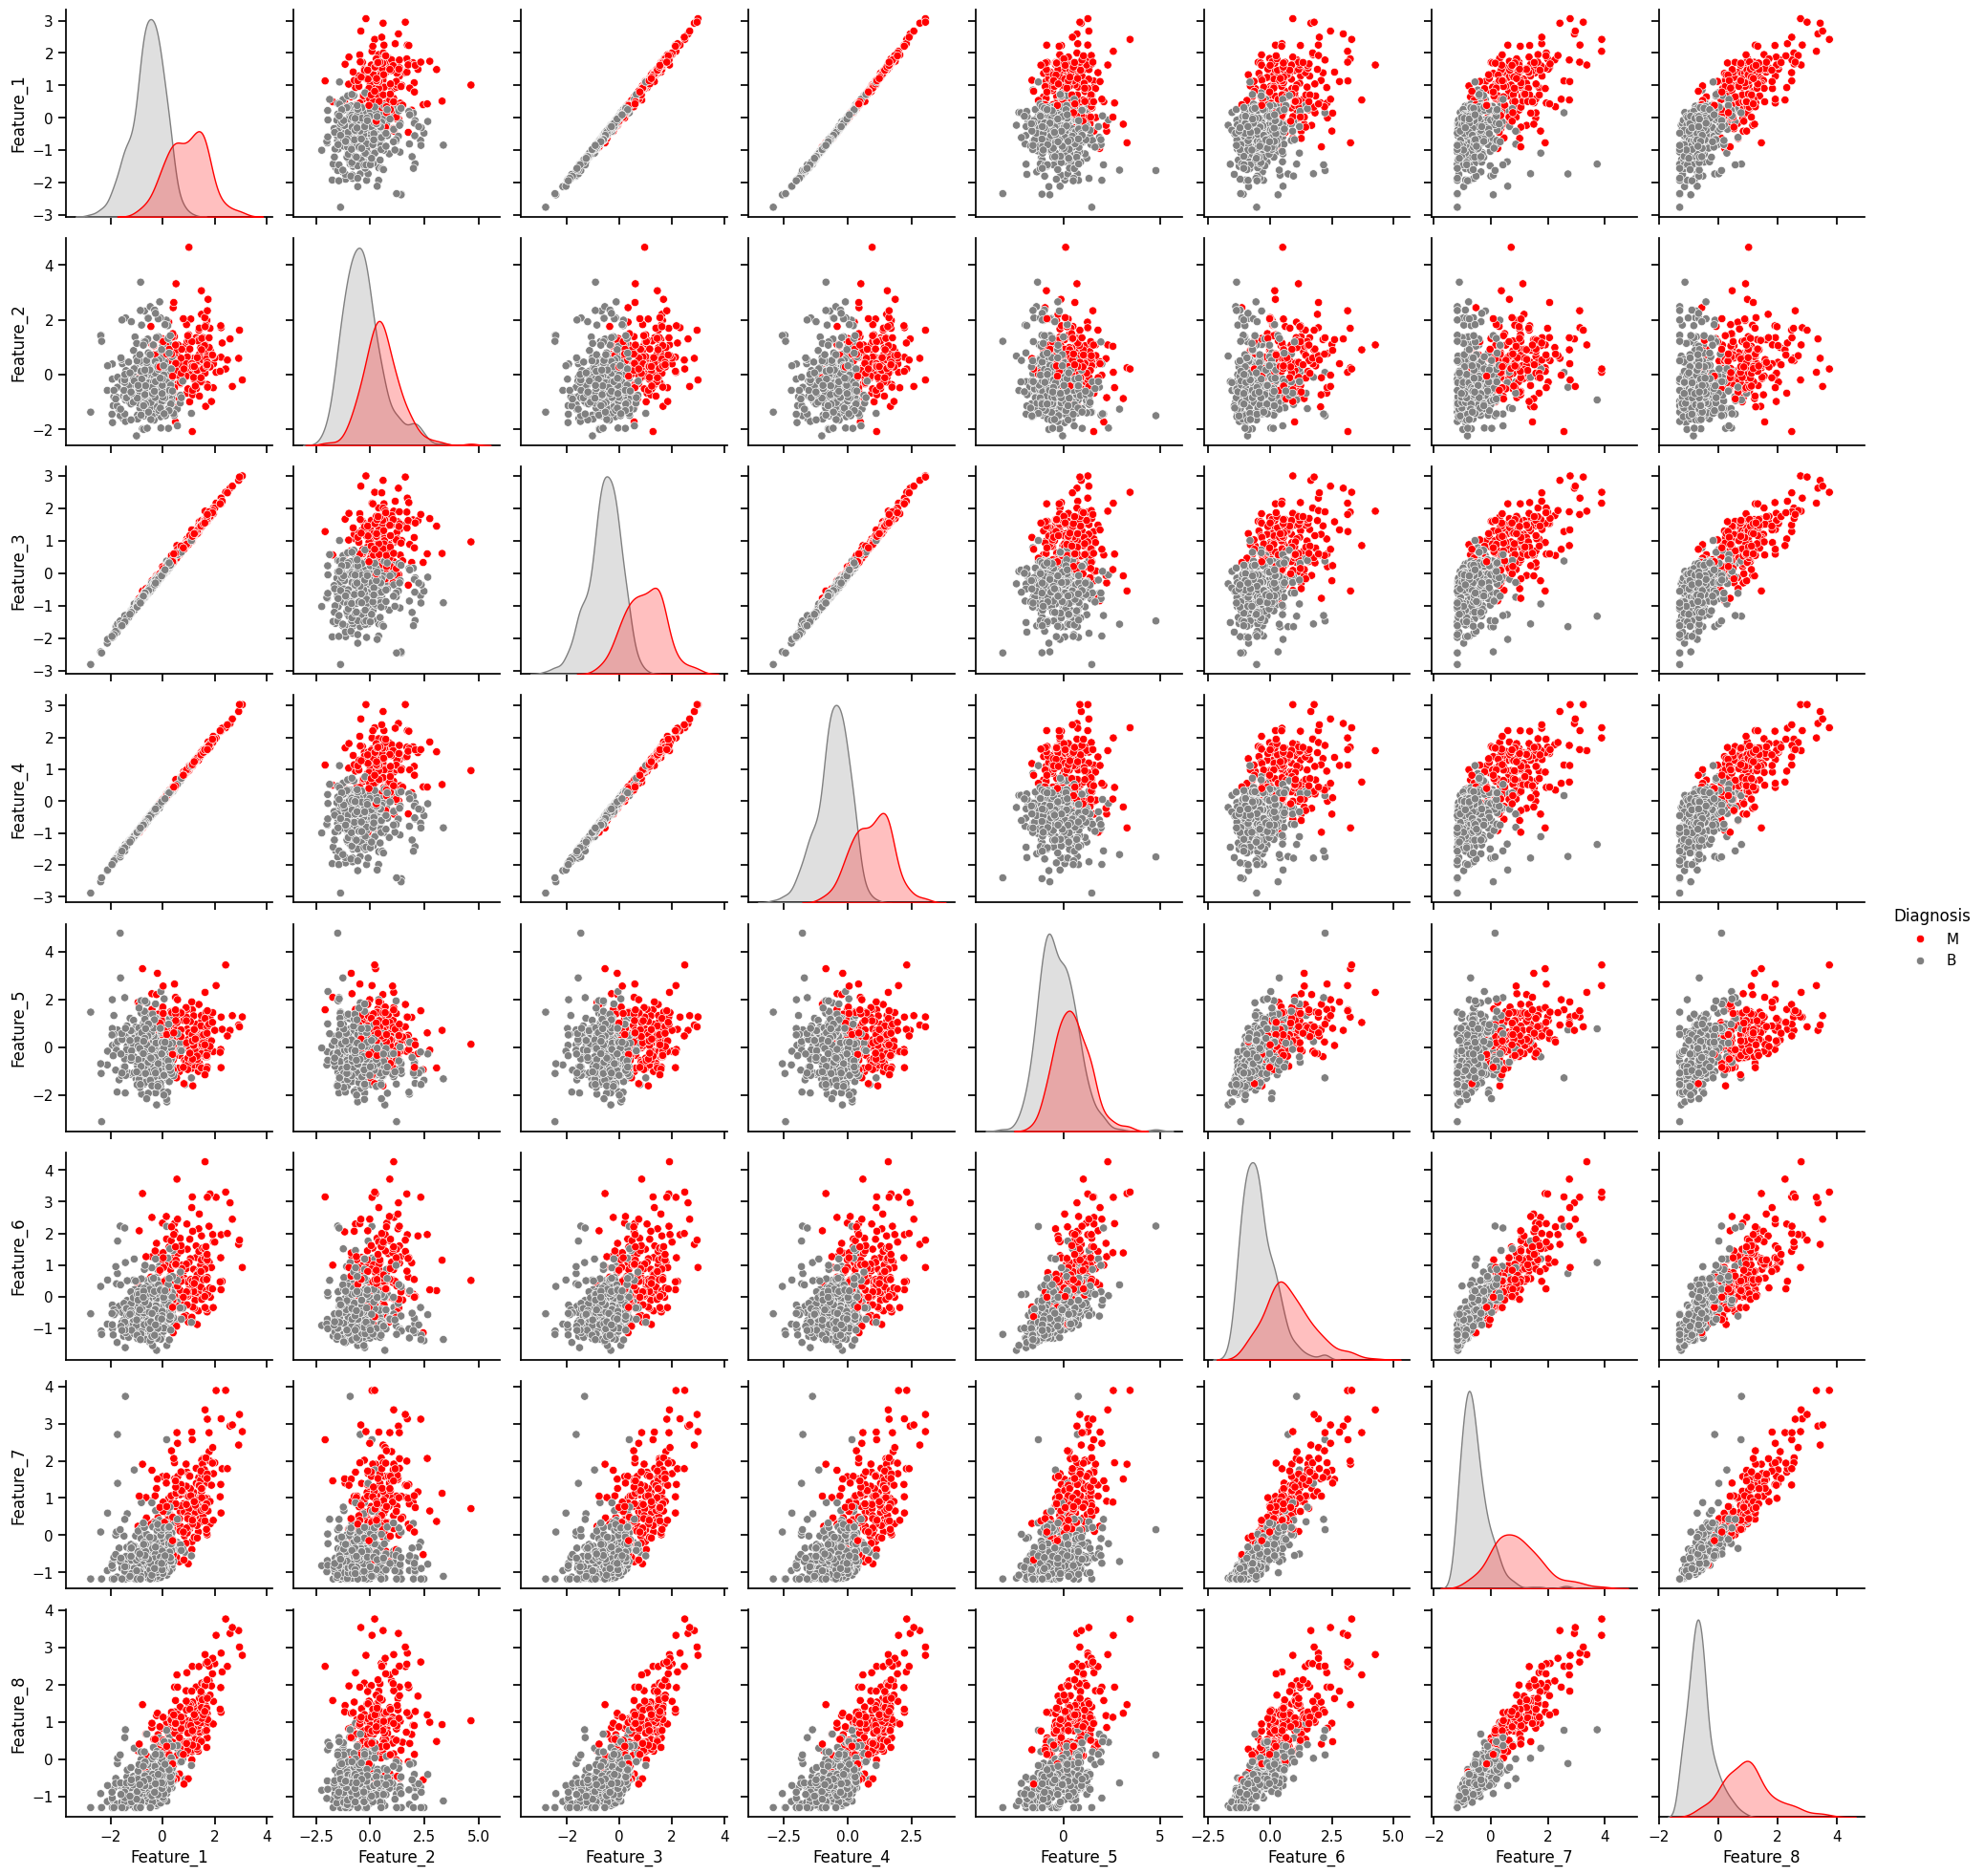

In [361]:
sns.set_context('notebook')
sns.pairplot(data[feature_columns[:8] + ['Diagnosis']],
             hue='Diagnosis',
             hue_order=['M', 'B'],
             palette={'M':'red', 'B':'gray'}
             )

Overall, the log transformations tend to supresses, to some degree, the large skewness observed within the raw data. We further observe strong co-linearity between certain features (i.e. `Feature_3` and `Feature_1`). This is possibly due to underlying correlations between certain geometrical attributes which were extrcted from digitized images (such as radius and area). By leveraging appropriate dimension reduction methods, we ensure that our machine learning model will not include such redundant features, therefore improving its efficiency and performance.

## Clustering

Clustering techniques are employed to group similar observations together. Three common clustering algorithms, K-Means, Agglomerative Hierarchical, and DBSCAN, were applied to the dataset.




### K-Means

We now fit a K-means clustering model with two clusters and examine the clusters by counting the number of Benign (B) and Malignant (M) instances in each cluster.


In [362]:
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(data[feature_columns])

data['kmeans'] = km.predict(data[feature_columns])

In [363]:
accuracy = (data[['Diagnosis','kmeans']]
 .groupby(['kmeans','Diagnosis'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

display(accuracy)

number
kmeans Diagnosis        
0      B             344
       M              33
1      B              13
       M             179

It is also possible to probe the accuracy metric here given the true labels for each observation and the corresponding K-Means predictions.

In [364]:
y_true = data.Diagnosis.replace('B',0).replace('M',1)
y_pred = data.kmeans.to_numpy()
print('clustering accuracy:',accuracy_score( y_true, y_pred ))

clustering accuracy: 0.9191564147627417


We visualize the results of K-Means clustering within a two dimensional plane. The latter is spanned by the two principal components based on the TSNE transformation.

Text(0, 0.5, 'principal component 2')

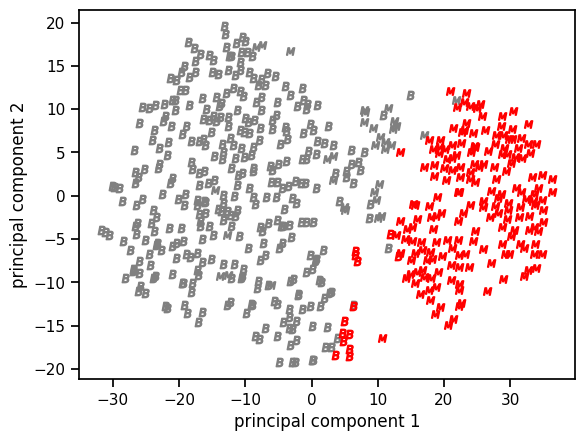

In [365]:
TSNEmod = TSNE(n_components=2)
X_transfrmd = TSNEmod.fit_transform(data[feature_columns])

#--- plot
marker= data.Diagnosis.replace('M','$M$').replace('B','$B$').to_numpy()
color = data.kmeans.replace(0,'grey').replace(1,'red').to_numpy()
for index,_ in enumerate(X_transfrmd):
  plt.scatter(X_transfrmd[index,0],X_transfrmd[index,1],color=color[index],marker=marker[index])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')


We Now fit K-Means models with cluster values ranging from 1 to 20.
For each model, we store the number of clusters and the inertia value.
We further plot cluster number vs inertia.


In [366]:
# Create and fit a range of models
km_list = list()
accuracy_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[feature_columns])
    #
    km_list.append(pd.Series({'clusters': clust,
                              'inertia': km.inertia_,
                              'model': km}))

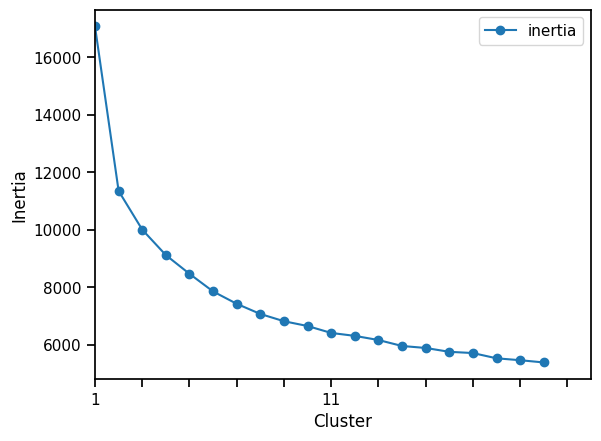

In [367]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');


However, we do not seem to get an ideal cluster number (i.e. around 2) because `Inertia` tends to smoothly decay with increasing number of clusters.

### Agglomerative clustering

Here, we fit an agglomerative clustering model with two clusters.
We compare the results to those obtained by K-means by reporting the number of M and B observations in each cluster.
We also Visualize the dendrogram produced by agglomerative clustering. SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.


In [368]:
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[feature_columns])
data['agglom'] = ag.fit_predict(data[feature_columns])

Note that cluster assignment is arbitrary, the respective primary cluster numbers for B and M may not be identical to the ones for K-means clustering.


In [369]:
# for Agglomerative Clustering:
accuracy = (data[['Diagnosis','agglom']]
 .groupby(['Diagnosis','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

display(accuracy)

number
Diagnosis agglom        
B         0           20
          1          337
M         0          186
          1           26

In [370]:
y_true = data.Diagnosis.replace('B',1).replace('M',0)
y_pred = data.agglom.to_numpy()
print('clustering accuracy:',accuracy_score( y_true, y_pred ))

clustering accuracy: 0.9191564147627417


The obtained accuracy is consistent with that of the K-Means clustering.



Text(0, 0.5, 'principal component 2')

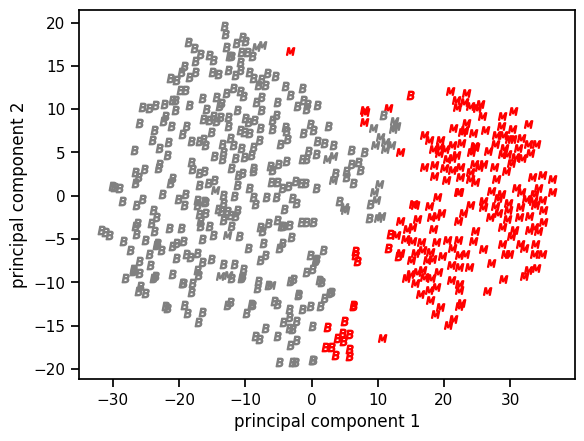

In [371]:
TSNEmod = TSNE(n_components=2)
X_transfrmd = TSNEmod.fit_transform(data[feature_columns])

#--- plot
marker= data.Diagnosis.replace('M','$M$').replace('B','$B$').to_numpy()
color = data.agglom.replace(1,'grey').replace(0,'red').to_numpy()
for index,_ in enumerate(X_transfrmd):
  plt.scatter(X_transfrmd[index,0],X_transfrmd[index,1],color=color[index],marker=marker[index])
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

And here is a plot of the dendrogram created from agglomerative clustering.


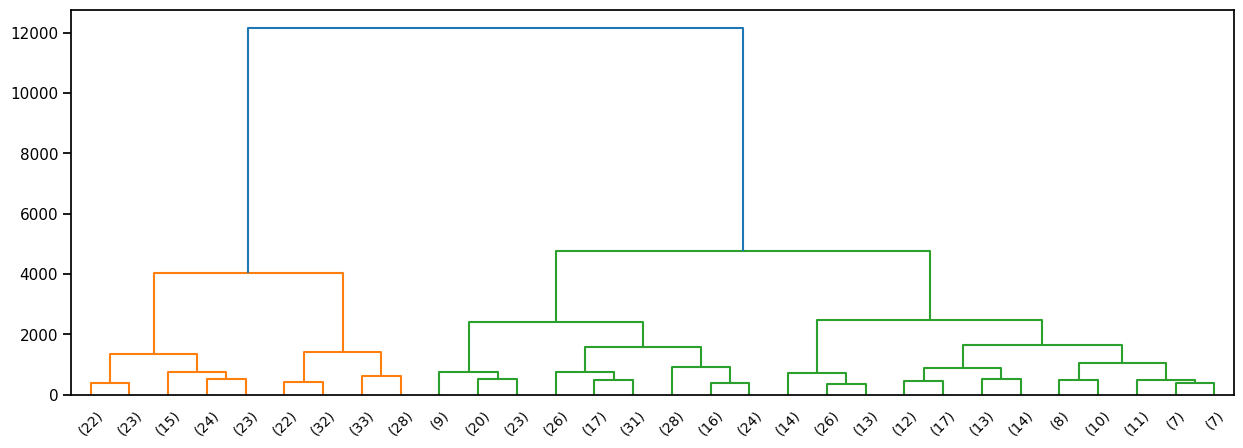

In [372]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


den = hierarchy.dendrogram(Z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

### DBSCAN

We apply a DBSCAN clustering model with `eps=2.5` and examine the number of clusters and asscoaietd number of Benign (B) and Malignant (M) instances.


In [373]:
cluster = DBSCAN(eps=2.5, min_samples=10)
cluster.fit(data[feature_columns])
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')
data['dbscan'] = cluster.fit_predict(data[feature_columns])

DBSCAN found 2 clusters and 326 points of noise.


In [374]:
# for DBSCAN Clustering:
accuracy = (data[['Diagnosis','dbscan']]
 .groupby(['Diagnosis','dbscan'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

display(accuracy)

number
Diagnosis dbscan        
B         -1         142
           1         215
M         -1         184
           0          17
           1          11

DBSCAN exhibits a fairly poor performance and fails to identify the correct number of clusters. A large fraction of samples were also labeled as "noise" (green symbols below).

Text(0, 0.5, 'principal component 2')

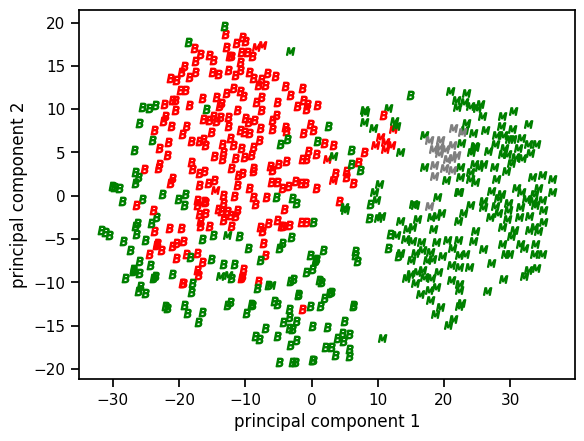

In [375]:
TSNEmod = TSNE(n_components=2)
X_transfrmd = TSNEmod.fit_transform(data[feature_columns])

#--- plot
marker= data.Diagnosis.replace('M','$M$').replace('B','$B$').to_numpy()
#color = data.dbscan.replace(0,'grey').replace(1,'red').to_numpy()
color = data.dbscan.replace(0,'grey').replace(1,'red').replace(-1,'green').to_numpy()
for index,_ in enumerate(X_transfrmd):
  plt.scatter(X_transfrmd[index,0],X_transfrmd[index,1],color=color[index],marker=marker[index])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

## Dimension Reduction
Dimension reduction techniques are used to reduce the number of features while preserving the underlying structure of the data. Principal Component Analysis was utilized for this purpose.

### PCA

In this section, we perform PCA with `n_components` ranging from 1 to 10.
We Store the amount of explained variance for each number of dimensions as well as the feature importance for each number of dimensions. It should be noted that PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance.


In [376]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 10):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data[feature_columns])

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': data[feature_columns].columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.450438
2,PCA(n_components=2),0.64504
3,PCA(n_components=3),0.738509
4,PCA(n_components=4),0.803629
5,PCA(n_components=5),0.858762
6,PCA(n_components=6),0.898732
7,PCA(n_components=7),0.918195
8,PCA(n_components=8),0.933061
9,PCA(n_components=9),0.945643


We create a table of feature importances for each data column.


In [377]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Feature_1,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,...,Feature_28,Feature_29,Feature_3,Feature_30,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
n,,,,,,,,,,,,,,,,,,,,,
1,0.042673,0.011450,0.040605,0.004110,0.042946,0.044617,0.001198,0.033537,0.031109,0.036664,...,0.050206,0.024653,0.044299,0.026027,0.042421,0.027804,0.047297,0.050755,0.051390,0.027006
2,0.045909,0.043127,0.027497,0.013343,0.026295,0.035483,0.023801,0.040765,0.036086,0.032181,...,0.027104,0.025104,0.044920,0.039729,0.046172,0.033098,0.039179,0.032458,0.028900,0.032941
3,0.031914,0.035089,0.038113,0.038033,0.036851,0.039110,0.036178,0.037676,0.035663,0.037512,...,0.029319,0.036566,0.031431,0.045259,0.032247,0.032002,0.032971,0.022623,0.020998,0.026495
4,0.029612,0.029365,0.036477,0.050222,0.034193,0.035561,0.032084,0.033350,0.033996,0.039564,...,0.023936,0.036132,0.029205,0.043367,0.029787,0.030396,0.028423,0.020535,0.020918,0.022631
5,0.024752,0.024366,0.037929,0.046159,0.033843,0.035305,0.035701,0.040088,0.043248,0.039197,...,0.020324,0.040246,0.024685,0.041067,0.025087,0.041934,0.023310,0.020056,0.020157,0.033142
6,0.022115,0.025244,0.034641,0.041751,0.030078,0.032139,0.045069,0.038377,0.040423,0.035821,...,0.019352,0.055276,0.022006,0.038000,0.022409,0.048754,0.021207,0.018283,0.020467,0.043201
7,0.021568,0.032479,0.041050,0.036311,0.036323,0.035384,0.049575,0.032825,0.044613,0.041503,...,0.021326,0.050323,0.021381,0.044633,0.021671,0.043998,0.020651,0.019783,0.020088,0.037909
8,0.019400,0.032068,0.038320,0.044115,0.033207,0.033272,0.059870,0.032914,0.041528,0.042948,...,0.020303,0.050087,0.018876,0.043526,0.019596,0.047683,0.021090,0.020441,0.021715,0.042646
9,0.022937,0.031993,0.041411,0.046544,0.035867,0.033795,0.052739,0.032121,0.043622,0.043222,...,0.019401,0.046964,0.022682,0.039756,0.022662,0.046594,0.023987,0.018050,0.022334,0.045629


Let's create a plot of explained variances.


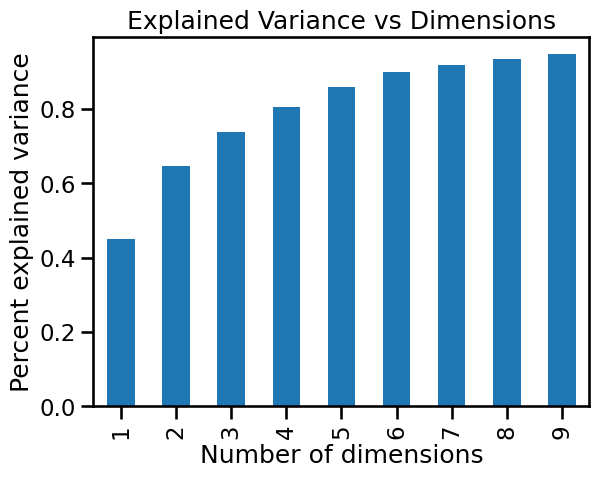

In [378]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');


And here's a plot of feature importances.


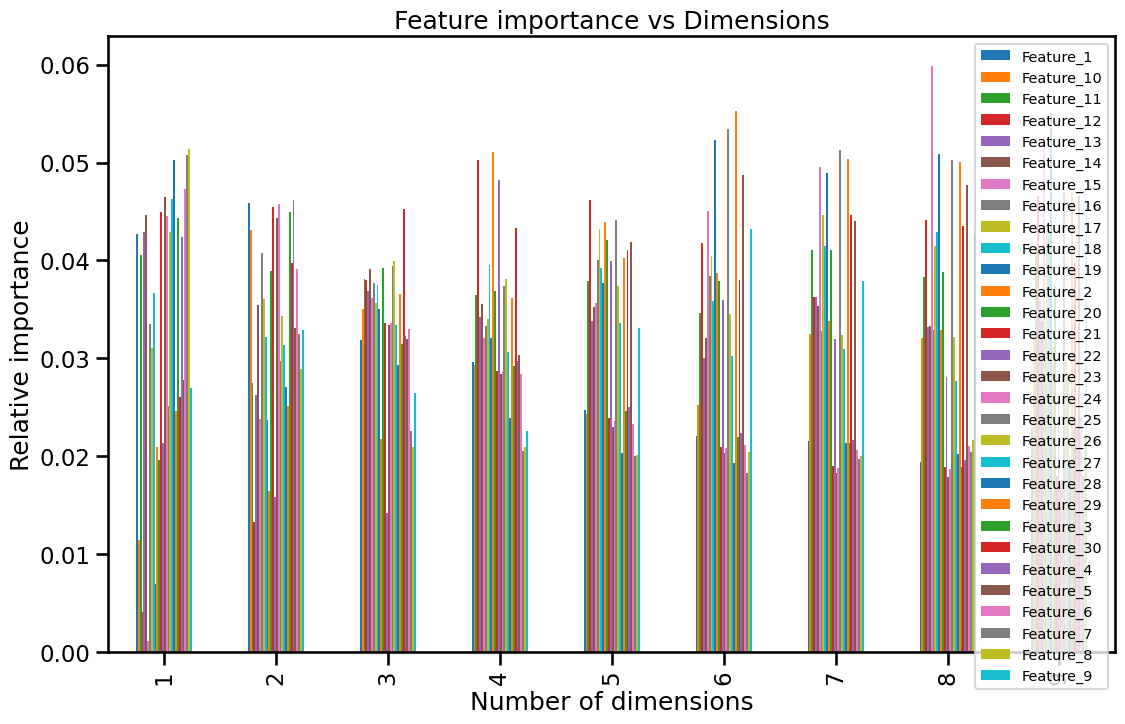

In [379]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right',fontsize='xx-small')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

Let's explore how our clustering accuracy may change if we include a `PCA` in our model building pipeline. Let's plan to use sklearn's `Pipeline` class and create a pipeline that has the following steps:
*  A scaler
*  PCA(n_components=n)
*  LogisticRegression(n_clusters=2)

We Write a function that takes in a value of `n` and makes the above pipeline, then predicts the "Diagnosis" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy
For various values of n, we call the above function and store the average accuracies.
We Plot the average accuracy by number of dimensions.


In [380]:

X = data[feature_columns]
y = data.Diagnosis.replace('M',0).replace('B',1)
sss = StratifiedShuffleSplit(n_splits=5, random_state=42,test_size=0.3, train_size=0.7)

def get_avg_score(n,**kwargs):
    if 'pca' in kwargs and kwargs['pca']:
      pipe = [
          ('pca', PCA(n_components=n)),
          ('estimator', LogisticRegression(solver='liblinear'))
      ]
    elif 'kernel_pca' in kwargs and kwargs['kernel_pca']:
      pipe = [
          ('kernel_pca', KernelPCA(n_components=n,kernel='rbf')),
          ('estimator', LogisticRegression(solver='liblinear'))
      ]
    elif 'nmf' in kwargs and kwargs['nmf']:
      pipe = [
          ('kernel_pca', NMF(n_components=n)),
          ('estimator', LogisticRegression(solver='liblinear'))
      ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = range(1,len(feature_columns)+1,1)
score_list_pca = [get_avg_score(n,pca=True) for n in ns]


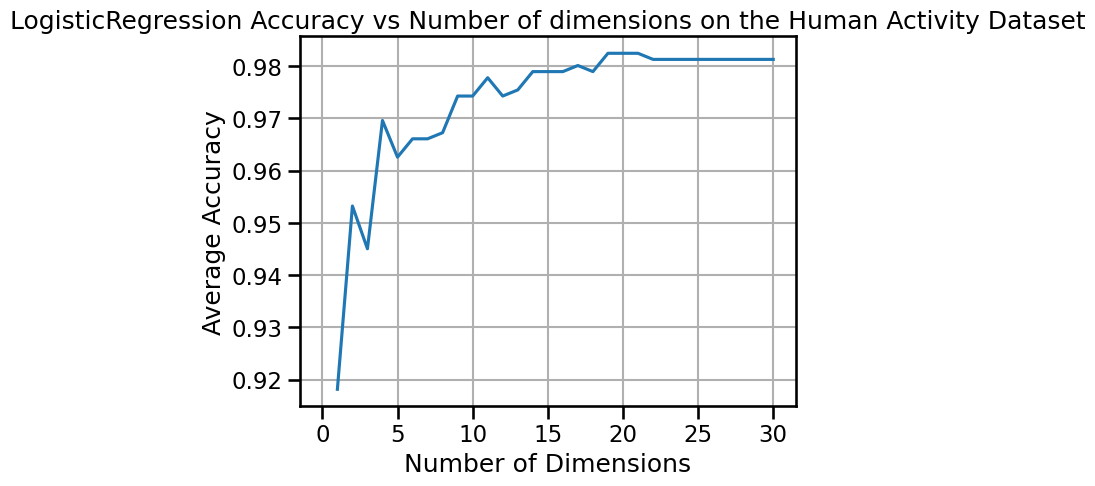

In [381]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list_pca)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.plot(base_line)
ax.grid(True)

By incuding approximately 15 principal component, we achieve the accuarcy of nearly 98%.



# Conclusions and Discussions

The K-Means algorithm successfully grouped the observations into two distinct clusters.
Visual inspection of the clusters showed that the algorithm accurately differentiated between the Benign (B) and Malignant (M) groups.
The dendrogram also revealed clear separations between the two species, supporting the results of the K-Means clustering.
This method also highlighted potential sub-clusters within the main clusters, indicating variations within the two groups.
However, DBSCAN failed to identify the clusters correctly, possibly due to varying cluster densities.

As for the Principal Component Analysis (PCA), the first six principal components explained over 90% of the variance within the data.
By including these six principal components and trainig a logistc regressor, one may achieve an accuaracy of about 96%.
The application of clustering and dimension reduction techniques provided valuable insights into the Breast Cancer Wisconsin dataset. The clustering algorithms effectively grouped similar observations, aligning with the known species classifications. PCA reduced the dimensionality of the data while preserving its structure, facilitating easier visualization and interpretation.

Relevant files are available on my [Github](https://).